# Query Hydrofabric Data Version 1.2 via Amazon S3 Bucket

**Authors**: 
- Irene Garousi-Nejad <igarousi@cuahsi.org>, 
- Tony Castronova <acastronova@cuahsi.org>

**Last Updated**: 04.13.2023

**Description**:  

The objective of this Jupyter Notebook is to query the National Hydrologic Geospatial (Hydrofabric) data that is designed to 
execute the [NOAA Next Generation (NextGen) Water Resource Modeling](https://github.com/NOAA-OWP/ngen) framework (Johnson, 2022). 
The Hydrofabric data are publicly available in the [AWS catalog for the current NWM hydrofabric artifacts](https://nextgen-hydrofabric.s3.amazonaws.com/index.html). Currently, there are three versions of this dataset. V1.0 was released September 01, 2022 as an intial beta product (Johnson, 2022). In this notebook, we use Version 1.2 which is the most recent version available on the Amazon S3 Bucket as of the time of developing this notebook (https://nextgen-hydrofabric.s3.amazonaws.com/index.html#v1.2/).

**Software Requirements**:

The software and operating system versions used to develop this notebook are listed below. To avoid encountering issues related to version conflicts among Python packages, we recommend creating a new environment variable and installing the required packages specifically for this notebook. 

OS: Microsoft Windows 11 Pro version 10.0.22621
> Conda: 22.9.0  \
> Python: 3.9.16  \
> re: 2.2.1  \
> wget: 3.2  \
> xarray: 2022.11.0  \
> pyproj: 3.5.0  \
> rioxarray: 0.14.0  \
> numpy: 1.23.5  \
> pandas: 2.0.0  \
> geopandas: 0.12.2  \
> netCDF4: 1.6.3  \
> cartopy: 0.21.1  \
> matplotlib: 3.7.1 \
> owslib: 0.24.1 \
> s3fs: 2023.03.0 \
> boto3: 1.24.28 \
> fsspec: 2023.3.0 \
> fiona:  1.9.1

Reference:
- Johnson, J. M. (2022). National Hydrologic Geospatial Fabric (hydrofabric) for the Next Generation (NextGen) Hydrologic Modeling Framework, HydroShare, http://www.hydroshare.org/resource/129787b468aa4d55ace7b124ed27dbde

---

In [23]:
import boto3
import fsspec
import geopandas
import folium
import fiona
import matplotlib.pyplot as plt

## What does a Hydrofabric geopackage file contain?

A comprehensive details on the hydrofabric geopackage content can be found in [here](https://noaa-owp.github.io/hydrofabric/articles/hf_dm.html). You can check the available layers in the GeoPackage file by opening it in QGIS or using the `fiona.listlayers()` function as follows:


In [11]:
%%bash 
wget https://nextgen-hydrofabric.s3.amazonaws.com/v1.2/nextgen_01.gpkg --quiet

In [12]:
layer_names = fiona.listlayers('nextgen_01.gpkg')
print(layer_names)

['flowpaths', 'divides', 'nexus', 'flowpath_attributes', 'flowpath_edge_list', 'crosswalk', 'cfe_noahowp_attributes', 'forcing_metadata']


## Define parameters

Define the NHDPlusV2 **V**ector **P**rocessing **U**nits (VPU) of the interest, which will be used later to create the name of the S3 bucket and object key that you want to read from. You can find if through [this interactive map](https://noaa-owp.github.io/hydrofabric/articles/data_access.html). 

In [25]:
vpu = '01'

## Access data via Amazon S3

Initialize an instance of the `boto3` library's `s3` resource to create a resource object that represent an S3 bucket.  

In [17]:
s3 = boto3.resource('s3')

Once you have created the `s3` filesystem object, you can use it to interact with the S3 bucket using various methods and properties provided by the `fsspec` library. `fsspec` is a Python library that provides a common interface for accessing various file systems, including local file systems, network file systems, and cloud object stores such as Amazon S3. In the following code cell, we are creating filesystem object that represents an S3 bucket with anonymous access.

In [18]:
s3 = fsspec.filesystem('s3', anon=True)

Read a GeoPackage file from S3 and creating a GeoDataFrame using `geopandas` library.

In [35]:
with s3.open(f's3://nextgen-hydrofabric/v1.2/nextgen_{vpu}.gpkg') as f:
        
    # Read the file-like object into a GeoDataFrame
    gdf_divide = geopandas.read_file(f, layer='divides')

In [36]:
gdf_divide.head()

,id,areasqkm,type,toid,geometry
0,cat-5660,24.094809,network,tnx-1000000016,"MULTIPOLYGON (((2203425.003 2731485.001, 22034..."
1,cat-6158,23.094899,network,tnx-1000000043,"MULTIPOLYGON (((2151435.000 2700315.003, 21512..."
2,cat-12402,21.618444,network,nex-12403,"MULTIPOLYGON (((1909275.000 2479664.995, 19091..."
3,cat-13056,22.601701,network,nex-12679,"MULTIPOLYGON (((1905554.999 2482364.999, 19054..."
4,cat-13238,22.038293,network,nex-12908,"MULTIPOLYGON (((1907055.004 2488574.997, 19070..."


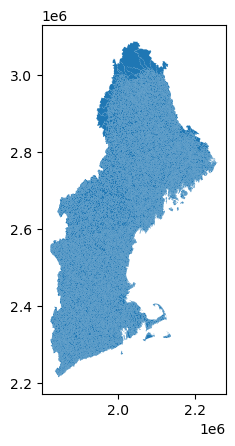

In [37]:
gdf_divide.iloc[:].plot()

plt.show()

In [32]:
with s3.open(f's3://nextgen-hydrofabric/v1.2/nextgen_{vpu}.gpkg') as f:
        
    # Read the file-like object into a GeoDataFrame
    gdf_flowpath = geopandas.read_file(f, layer='flowpaths')

In [33]:
gdf_flowpath.head()

,id,lengthkm,main_id,member_comid,tot_drainage_areasqkm,order,realized_catchment,toid,geometry
0,wb-5,3.695258,2238463,"4287171,4287061,4287169,4287115",6.786451,1.0,cat-5,tnx-1000000001,"LINESTRING (2122039.563 2984908.332, 2121999.8..."
1,wb-2037,5.135779,2243682,"816563,816417,816415",51.657763,2.0,cat-2037,tnx-1000000002,"LINESTRING (2134966.026 2947241.817, 2135041.5..."
2,wb-2228,6.080505,2244227,"818615,818525",22.296154,2.0,cat-2228,tnx-1000000004,"LINESTRING (2154184.250 2878625.508, 2154200.4..."
3,wb-2233,6.157765,2244231,"816973,816967,816965",102.941990,2.0,cat-2233,tnx-1000000005,"LINESTRING (2138778.625 2923132.088, 2138842.2..."
4,wb-2241,7.227342,2244250,"817527,817317,818619",17.593197,1.0,cat-2241,tnx-1000000006,"LINESTRING (2153462.201 2882989.185, 2153518.9..."


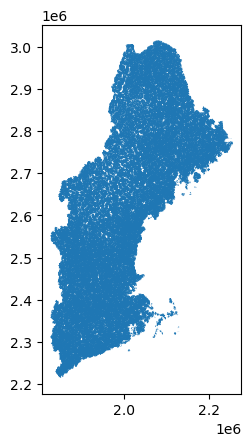

In [34]:
gdf_flowpath.iloc[:].plot()

plt.show()

## Select a catchment ID

To DO